### Задание

Постройте наивный баессовский классификатор для датасета MNIST (так же есть в торче). Классификатор строить только для двух цифр (1 и 2).  
Оцените качество полученного классификатора на тестовой выборке.  
Выведите 10 ошибок предсказания. 

In [1]:
import torch 
import torchvision
from tqdm import tqdm
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [3]:
mnist_train = torchvision.datasets.MNIST('../', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('../', train=False, transform=transform, download=True)

In [4]:
train, test = torch.utils.data.DataLoader(mnist_train, 256, shuffle=True), torch.utils.data.DataLoader(mnist_test, 256)

In [5]:
len(mnist_train)

60000

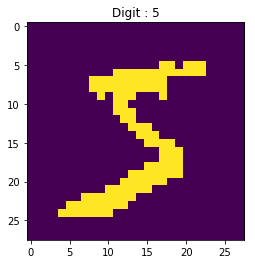

In [9]:
plt.imshow(mnist_train[0][0].reshape((28,28)))
plt.title(f'Digit : {mnist_train[0][1]}')
plt.show()

In [72]:
for X, y in tqdm(train):
    indexes = np.where( np.isin( y.numpy(), [1, 2] ) )[0]        
    try:
        X_train = torch.cat((X_train, X[ indexes ]), dim=0)
    except NameError:
        X_train = X[indexes]
    try:
        y_train = torch.cat((y_train, y[ indexes ]), dim=0)
    except NameError:
        y_train = y[indexes] 

100%|████████████████████████████████████████████████████████████████████████████████| 235/235 [00:08<00:00, 27.80it/s]


In [73]:
for X, y in tqdm(test):
    indexes = np.where( np.isin( y.numpy(), [1, 2] ) )[0]        
    try:
        X_test = torch.cat((X_test, X[ indexes ]), dim=0)
    except NameError:
        X_test = X[indexes]
    try:
        y_test = torch.cat((y_test, y[ indexes ]), dim=0)
    except NameError:
        y_test = y[indexes] 

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 38.33it/s]


In [117]:
pd.Series(y_train).value_counts()

1    6742
2    5958
dtype: int64

In [167]:
# заполним вероятности для цифр 1 и 2 
p_picture_digit = torch.zeros((2,784))
p_digit  = torch.zeros((2))

p_picture = X_train.sum(axis=0) / X_train.sum()

for i in [1,2]:
    p_picture_digit[i - 1] = X_train[y_train == i].sum(axis=0) / X_train[y_train == i].sum()
    p_digit[i - 1] = torch.tensor( (y_train == i).sum(), dtype=torch.float32) / len(y_train)
    print(f'Digit {i} probability : {p_digit[i - 1]}')

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


Digit 1 probability : 0.5308661460876465
Digit 2 probability : 0.4691338539123535


In [162]:
p_picture_digit.shape

torch.Size([2, 784])

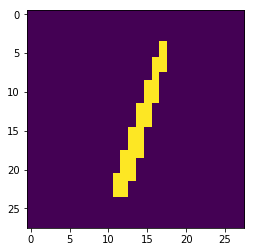

In [217]:
# Для примера возьмем цифру 1
index = 1
test_digit = y_test[index]
test_sample = X_test[ index ]
plt.imshow(X_test[index].reshape((28,28)))
plt.show()

In [212]:
# test for digit 1
np.exp( np.log(p_digit[test_digit - 1]) + np.log( (test_sample * p_picture_digit[test_digit - 1])[test_sample == test_digit] ).sum() - np.log((test_sample * p_picture)[test_sample == test_digit]).sum() )

tensor(0.4691)

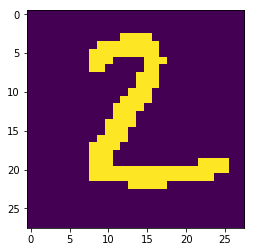

In [218]:
# Для примера возьмем цифру 2
index = 0
test_digit = y_test[index]
test_sample = X_test[ index ]
plt.imshow(X_test[index].reshape((28,28)))
plt.show()

In [220]:
# test for digit 2
np.exp( np.log(p_digit[test_digit - 1]) + np.log( (test_sample * p_picture_digit[test_digit - 1])[test_sample == test_digit] ).sum() - np.log((test_sample * p_picture)[test_sample == test_digit]).sum() )

tensor(0.4691)